<a href="https://colab.research.google.com/github/veronica1013/Titanic_Analysis/blob/main/Titanic_Analysis_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Titanic Analysis

#### 1.0 Defining the Question
#### a.) Specifying the Question
Using Naive Bayes classifier to create a model that predicts which email is spam or not.

#### b.) Defining the Metric for Success
*   Predicting if an email was spam or not
*   Computing the accuracy (percentage of correct classification).
*   Reporting the confusion matrix of each classifier.
*   Applying at least one of the optimization techniques.
*   Providing recommendations to improve Naive Bayes classifier.

#### c.) Understanding the Context
The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...

The collection of spam e-mails came from our postmaster and individuals who had filed spam. Our collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam. These are useful when constructing a personalized spam filter. One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate a general purpose spam filter. Information available on UCI Machine Learning Repository [website](htthttps://archive.ics.uci.edu/ml/datasets/Spambaseps://).

#### External Data Validation

I performed data validation with information avalilable on UCI Machine Learning Repository website. the website can be accessed from this [link](https://archive.ics.uci.edu/ml/datasets/Spambase). The details is as indicated below:

**Data Set Information**

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...

The collection of spam e-mails came from our postmaster and individuals who had filed spam. Our collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam. These are useful when constructing a personalized spam filter. One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate a general purpose spam filter.

**Background on spam:**

Cranor, Lorrie F., LaMacchia, Brian A. Spam!
Communications of the ACM, 41(8):74-83, 1998.

> ~7% misclassification error. False positives (marking good mail as spam) are very undesirable.If we insist on zero false positives in the training/testing set, 20-25% of the spam passed through the filter.

**Attribute Information:**

> The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes:

> 48 continuous real [0,100] attributes of type word_freq_WORD
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string.

> 6 continuous real [0,100] attributes of type char_freq_CHAR]
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail

> 1 continuous real [1,...] attribute of type capital_run_length_average
= average length of uninterrupted sequences of capital letters

> 1 continuous integer [1,...] attribute of type capital_run_length_longest
= length of longest uninterrupted sequence of capital letters

> 1 continuous integer [1,...] attribute of type capital_run_length_total
= sum of length of uninterrupted sequences of capital letters
= total number of capital letters in the e-mail

> 1 nominal {0,1} class attribute of type spam
= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.

### Importing the Relevant Libraries

In [ ]:
import pandas as pd
import numpy as np
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#for word embedding
import gensim
from gensim.models import Word2Vec

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


## Loading the data

In [ ]:
# Uploading the spambase data

spam_df= pd.read_csv('spambase.data')
spam_df.head(2)

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1


From the above, it is difficult to know what each column represents. I will therefore extract the details of the columnnames from the spambase names file.

In [ ]:
# Extract details from the 'spambase.names' file and save the in a file 'name_details
name_details = []
with open('spambase.names') as f:
  name_details = f.read()

# Preview the name details
name_details


'| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)\n|\n| 48 continuous real [0,100] attributes of type word_freq_WORD \n| = percentage of words in the e-mail that match WORD,\n| i.e. 100 * (number of times the WORD appears in the e-mail) / \n| total number of words in e-mail.  A "word" in this case is any \n| string of alphanumeric characters bounded by non-alphanumeric \n| characters or end-of-string.\n|\n| 6 continuous real [0,100] attributes of type char_freq_CHAR\n| = percentage of characters in the e-mail that match CHAR,\n| i.e. 100 * (number of CHAR occurences) / total characters in e-mail\n|\n| 1 continuous real [1,...] attribute of type capital_run_length_average\n| = average length of uninterrupted sequences of capital letters\n|\n| 1 continuous integer [1,...] attribute of type capital_run_length_longest\n| = length of longest uninterrupted sequence of capital letters\n|\n| 1 continuous integer [1,...] attribute of type capital_run_length_total\n| = sum of length of unint

In [ ]:
# From the previwed name details, remove unwanted information
split_name = name_details.split(sep='\n')
split_name[33:]

# Loop through the names and remove special characters
# Save the clene details in a list 'Column_names'
column_names = []
for line in split_name[33:]:
  matched = re.split(r':.*$', line)
  column_names.append(matched[0])
  column_names

# Preview the column names
column_names

['word_freq_make',
 'word_freq_address',
 'word_freq_all',
 'word_freq_3d',
 'word_freq_our',
 'word_freq_over',
 'word_freq_remove',
 'word_freq_internet',
 'word_freq_order',
 'word_freq_mail',
 'word_freq_receive',
 'word_freq_will',
 'word_freq_people',
 'word_freq_report',
 'word_freq_addresses',
 'word_freq_free',
 'word_freq_business',
 'word_freq_email',
 'word_freq_you',
 'word_freq_credit',
 'word_freq_your',
 'word_freq_font',
 'word_freq_000',
 'word_freq_money',
 'word_freq_hp',
 'word_freq_hpl',
 'word_freq_george',
 'word_freq_650',
 'word_freq_lab',
 'word_freq_labs',
 'word_freq_telnet',
 'word_freq_857',
 'word_freq_data',
 'word_freq_415',
 'word_freq_85',
 'word_freq_technology',
 'word_freq_1999',
 'word_freq_parts',
 'word_freq_pm',
 'word_freq_direct',
 'word_freq_cs',
 'word_freq_meeting',
 'word_freq_original',
 'word_freq_project',
 'word_freq_re',
 'word_freq_edu',
 'word_freq_table',
 'word_freq_conference',
 'char_freq_;',
 'char_freq_(',
 'char_freq_[',
 '

In [ ]:
# Append the details of the column names to the spambase.data 
column_names = column_names[:-1]
column_names.append('spam_email')
df = pd.read_csv('spambase.data', names =column_names )
df.head(2)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_email
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.0,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.0,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.778,0.00,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.0,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.0,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.132,0.0,0.372,0.18,0.048,5.114,101,1028,1


#### Preview the Data

In [ ]:
# check the shape of the dataframe
df.shape

(4601, 58)

In [ ]:
# Preview the last three rows of the data
df.tail(3)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_email
4598,0.30,0.0,0.30,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [ ]:
# Sample through the data
df.sample(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_email
813,0.00,0.00,0.00,1.16,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,3.48,0.0,2.32,0.0,0.00,2.32,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,8.733,42,131,1
513,0.35,0.08,0.35,0.00,0.35,0.00,0.0,0.52,0.61,1.76,0.17,0.26,0.79,0.0,0.26,0.00,0.70,0.35,2.64,0.0,2.03,0.0,0.61,0.70,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.08,0.00,0.0,0.08,0.17,0.0,0.0,0.0,0.0,0.17,0.0,0.0,0.0,0.000,0.081,0.0,0.556,0.069,0.011,19.234,1170,3116,1
1142,0.00,0.00,1.26,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,1.26,0.0,0.00,0.00,2.53,5.06,2.53,0.0,3.79,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.000,0.0,1.900,0.475,0.000,1.763,11,67,1
3325,0.00,0.00,0.26,0.00,0.53,0.00,0.0,0.00,0.00,0.00,0.00,0.26,0.00,0.0,0.00,0.00,0.26,0.00,0.00,0.0,0.00,0.0,0.00,0.00,1.61,0.8,0.0,0.00,0.53,0.8,0.0,0.0,0.0,0.0,0.0,0.80,0.26,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.26,0.0,0.0,0.0,0.128,0.042,0.0,0.000,0.000,0.000,1.635,6,139,0
19,0.00,0.63,0.00,0.00,1.59,0.31,0.0,0.00,0.31,0.00,0.00,0.63,0.00,0.0,1.27,0.63,0.31,3.18,2.22,0.0,1.91,0.0,0.31,0.63,0.00,0.0,0.0,0.31,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,1.59,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.275,0.0,0.055,0.496,0.000,3.509,91,186,1


In [ ]:
# Check for missing Values
df.isna().sum()


word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

There are no missing values

In [ ]:
# Check for duplicates
df.duplicated().sum()


391

In [ ]:
# Preview datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4210 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4210 non-null   float64
 1   word_freq_address           4210 non-null   float64
 2   word_freq_all               4210 non-null   float64
 3   word_freq_3d                4210 non-null   float64
 4   word_freq_our               4210 non-null   float64
 5   word_freq_over              4210 non-null   float64
 6   word_freq_remove            4210 non-null   float64
 7   word_freq_internet          4210 non-null   float64
 8   word_freq_order             4210 non-null   float64
 9   word_freq_mail              4210 non-null   float64
 10  word_freq_receive           4210 non-null   float64
 11  word_freq_will              4210 non-null   float64
 12  word_freq_people            4210 non-null   float64
 13  word_freq_report            4210 

### Cleaning the data



In [ ]:
# Remove duplicate values
df.drop_duplicates(inplace=True)

# Confirm that the duplicates have been dropped
df.duplicated().sum()

0

### Check for normality of the data to help in determining which machine learning model that will be used

In [ ]:
# Preview column names
df.columns, df.shape

(Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
        'word_freq_our', 'word_freq_over', 'word_freq_remove',
        'word_freq_internet', 'word_freq_order', 'word_freq_mail',
        'word_freq_receive', 'word_freq_will', 'word_freq_people',
        'word_freq_report', 'word_freq_addresses', 'word_freq_free',
        'word_freq_business', 'word_freq_email', 'word_freq_you',
        'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
        'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
        'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
        'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
        'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
        'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
        'word_freq_original', 'word_freq_project', 'word_freq_re',
        'word_freq_edu', 'word_freq_table', 'word_freq

In [ ]:
# Then Check the data distribution type by performing a normality test using the Shapiro Test
# importing the shapiro function
from scipy.stats import shapiro

col_names3 = df[:-1].values
col_names3

# Test for normality
stat, p = shapiro(col_names3)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpreting the results
alpha = 0.05
if p > alpha: 
  print('Sample looks Guassian.')
else:
  print('Sample does not look Guassian.')

Statistics=0.037, p=0.000
Sample does not look Guassian.


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


#### Performing Exploratory Data Analysis

In [ ]:
# Preview unique values on spam_email column
df['spam_email'].unique()

array([1, 0])

According to the details provided on the UCI Machine Learning Repository website, the last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0). The UCI Machine Learning Repository website link is found [here](https://archive.ics.uci.edu/ml/datasets/Spambase).

In [60]:
# Preview the total number of mpam and non-spam emails
x = df['spam_email'].value_counts()
x

0    2531
1    1679
Name: spam_email, dtype: int64

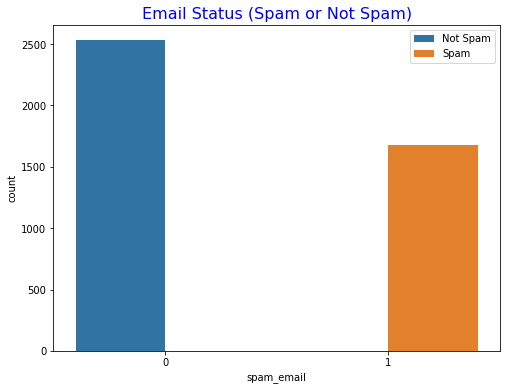

In [ ]:
# A countplot for Spam Email denoted by 1 and Non Spam Email denoted by 0.
plt.figure(figsize=(8,6))
sns.countplot(x='spam_email', data=df, hue='spam_email')
plt.legend(['Not Spam', 'Spam'])
plt.title('Email Status (Spam or Not Spam)', fontsize=16, color='blue')
plt.show();

From the countplot above, the emails that are noted as spam are more than half of those that are not spam. That's a huge number to have a spam emails.

### Performing Multicollinearity

In [61]:
# Set status as the dependent variable
# Compute the correlation then use the correlation to compute the VIF score for each variable
# We'll drop the price column
corr_df = df.copy(deep=True)
corr_df.drop(columns=['spam_email'], inplace=True)
prediction_df = corr_df.corr()
prediction_df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
word_freq_make,1.000000,0.034012,0.063207,0.005388,0.021740,0.055067,0.011061,-0.004370,0.103842,0.040829,0.063031,0.075911,0.061985,0.032263,0.022454,0.065443,0.081471,0.051571,0.120563,0.020924,0.121458,-0.025574,0.126478,0.205689,-0.075054,-0.063467,-0.048086,-0.050054,-0.041541,-0.054241,-0.038899,-0.031634,-0.042715,-0.026322,-0.046083,-0.057296,-0.058771,-0.008626,-0.011199,-0.035467,-0.005280,-0.026546,-0.025603,-0.022980,-0.037848,-0.034455,-0.000950,-0.018904,-0.027248,-0.019636,-0.034784,0.059184,0.101957,-0.009149,0.044783,0.059128,0.084127
word_freq_address,0.034012,1.000000,0.027789,-0.008947,0.036975,0.005526,0.077374,0.013706,0.053426,0.184304,0.060724,0.026247,0.015538,0.012414,0.061826,0.046630,0.022018,0.178853,0.055876,-0.006735,0.117797,0.001214,0.007064,0.061282,-0.053573,-0.044627,-0.011228,-0.033000,-0.026048,-0.029419,-0.015937,0.028852,-0.032575,0.026039,-0.025524,-0.028262,0.003749,-0.012708,-0.016208,0.002326,-0.019350,-0.035908,0.037681,-0.029055,0.020029,-0.026004,-0.012337,-0.020947,0.014735,-0.028348,-0.019436,0.031858,0.044354,0.030669,0.029355,0.053870,0.034590
word_freq_all,0.063207,0.027789,1.000000,-0.019901,0.065676,0.066547,0.028581,0.007221,0.077561,0.025138,0.055647,0.065733,0.036431,0.004900,0.104574,0.061937,0.029834,0.110794,0.126502,0.030874,0.147895,-0.039464,0.106694,0.031150,-0.092684,-0.066464,-0.081297,-0.051471,-0.057847,-0.030519,-0.036610,-0.063579,-0.058002,-0.063417,-0.048968,-0.047593,-0.074329,0.031756,-0.017418,-0.046013,-0.030822,-0.007620,-0.052736,-0.056883,-0.056600,-0.060558,0.027384,-0.029465,-0.036778,-0.024545,-0.035805,0.097316,0.072944,-0.004520,0.095671,0.092513,0.051961
word_freq_3d,0.005388,-0.008947,-0.019901,1.000000,0.000256,-0.009163,0.014289,0.003801,-0.001040,-0.003845,-0.013191,-0.018577,-0.013153,0.003379,0.005375,0.005798,-0.002827,0.016561,-0.009933,-0.005006,0.004577,0.030589,0.014715,0.025851,-0.015702,-0.014030,-0.009710,-0.010630,-0.007931,-0.010911,-0.007654,-0.006967,-0.008246,-0.006975,-0.005907,-0.006309,-0.007436,-0.002723,-0.004506,-0.007654,-0.006075,-0.008318,-0.009384,-0.006114,-0.013178,-0.009432,-0.003409,-0.001861,-0.000028,-0.011443,-0.007514,-0.003867,0.008273,0.000134,0.005754,0.022105,0.023785
word_freq_our,0.021740,0.036975,0.065676,0.000256,1.000000,0.041392,0.135957,0.023411,0.014483,0.027233,0.079164,0.055007,0.020657,0.001586,0.048309,0.079198,0.137868,0.050785,0.083092,0.027838,0.142992,-0.022715,0.062136,0.000321,-0.076783,-0.079807,-0.062482,-0.064151,0.039627,-0.053613,-0.042054,-0.024256,-0.034749,-0.024555,-0.051058,-0.052210,-0.077682,0.133057,-0.045512,-0.017580,-0.052325,0.107706,-0.054583,0.002771,-0.049497,-0.083315,-0.028146,-0.035040,-0.035049,-0.054580,-0.027988,0.019203,0.040696,0.002144,0.050832,0.042985,-0.010498
word_freq_over,0.055067,0.005526,0.066547,-0.009163,0.041392,1.000000,0.046868,0.079704,0.097037,0.010099,0.056592,0.001582,0.067278,0.007932,0.140009,0.016681,0.057684,0.059196,0.083312,0.057502,0.105693,0.006869,0.181754,0.059429,-0.086682,-0.089520,-0.050811,-0.067771,-0.048898,-0.048262,-0.046347,-0.03

In [62]:
# Create a new dataframe with the inverse of the matrix above correlations
pd.DataFrame(np.linalg.inv(prediction_df.values), index = prediction_df.index, columns=prediction_df.columns)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
word_freq_make,1.101307,-0.004149,-0.015513,-0.000943,0.009130,-0.012852,0.035940,0.049783,-0.061157,-0.005142,-0.002407,-0.069767,-0.019472,-0.008093,0.054184,-0.031635,-0.052882,-0.024420,-0.047628,0.017752,-0.035872,0.021354,-0.106550,-0.181826,0.017743,0.005897,0.017008,0.000451,0.025073,0.018146,-0.004171,0.464784,0.018447,-0.540509,0.006108,0.026920,0.028469,0.000671,-0.016170,0.040049,-0.024390,-0.002442,-0.013158,0.006627,0.012635,0.015534,0.000030,0.005559,0.009466,-0.008444,0.021595,-0.017671,-0.015744,0.007463,-0.031333,0.009252,-0.038375
word_freq_address,-0.004149,1.107902,0.003449,0.015624,-0.011665,0.015299,-0.039440,0.014547,-0.006352,-0.189365,0.001803,-0.026909,0.011289,-0.011133,0.007194,-0.013729,0.017375,-0.195293,0.021102,0.028145,-0.067829,0.012870,0.043038,-0.026421,0.026019,0.017162,-0.001674,0.027832,0.024292,0.048690,0.030031,-0.521923,0.012288,0.283663,0.005823,0.050034,-0.025261,0.011170,0.016371,0.074208,0.005907,0.007657,-0.042277,0.015813,-0.041054,0.012958,0.015866,0.013124,-0.028008,0.044817,0.017210,-0.005564,-0.017674,-0.028109,0.001289,-0.037954,-0.005508
word_freq_all,-0.015513,0.003449,1.094293,0.023958,-0.019600,-0.020634,0.024997,0.028332,-0.023654,0.023129,0.001643,-0.045850,-0.004460,0.009541,-0.059010,-0.030515,0.027109,-0.063662,-0.071539,-0.003110,-0.088681,0.039762,-0.050933,0.027965,0.050296,0.003073,0.052397,0.007980,0.050844,-0.056212,-0.028826,-0.080209,0.039043,0.113481,0.017970,-0.019227,0.023059,-0.033002,-0.015303,0.023666,-0.000156,-0.029411,0.017639,0.046810,0.041781,0.044995,-0.029645,0.017771,0.009822,-0.009426,0.012886,-0.065861,0.002405,0.006386,-0.090984,-0.009322,-0.007165
word_freq_3d,-0.000943,0.015624,0.023958,1.006484,0.000997,0.015990,-0.012409,-0.003809,0.008478,0.001780,0.019921,0.017821,0.020065,-0.001240,0.004582,0.000789,0.005122,-0.019489,0.017488,0.009125,-0.002075,-0.030802,-0.013730,-0.026028,0.012780,0.006834,0.010545,0.003167,-0.001693,0.003476,0.002931,-0.030093,0.010092,0.011578,-0.000027,0.000196,-0.000153,0.001614,-0.003636,0.007599,0.001244,0.006976,0.004305,0.007533,0.011019,0.011275,0.003584,0.002550,0.015126,0.027071,0.007353,0.005285,-0.002557,0.008443,0.011907,-0.036225,-0.010699
word_freq_our,0.009130,-0.011665,-0.019600,0.000997,1.111598,-0.014713,-0.088868,0.023079,0.039620,0.002755,-0.015701,-0.024126,-0.002336,0.000210,-0.031291,-0.043996,-0.107250,-0.014951,-0.033373,0.015130,-0.086265,0.018949,-0.020021,0.040561,0.019009,0.039221,0.045948,0.015228,-0.029472,0.013434,0.018744,-0.128494,0.017743,0.054029,0.016362,0.016852,0.018952,-0.134256,0.016761,0.011321,0.010971,-0.104795,0.021748,-0.018432,0.028564,0.063014,0.029505,0.024766,0.010942,0.033274,0.003186,0.019770,0.001228,0.001452,-0.039854,-0.032368,0.036212
word_freq_over,-0.012852,0.015299,-0.020634,0.015990,-0.014713,1.077876,-0.009233,-0.048201,-0.043134,0.039818,0.004199,0.010394,-0.027591,0.009527,-0.075678,0.023631,0.003431,-0.010941,-0.023638,-0.030017,-0.029537,-0.005970,-0.120667,-0.020233,0.027458,0.036321,0.020130,0.023712,0.004637,-0.016057,0.009646,-0.103045,0.015571,0.04880

From the VIF score, there are no correlated variables.

I will now use naive bayes model to predict which emails are spam and which ones are not. Having in mind that the model did not have a Gaussian distribution, and the target or y label is binary, I will use Bernoulli Naive Bayes Classifier and word occurrence vectors to train the model. 

### Modelling

Having Naive Bayes classification as a form of supervised learning, I'll use Linear Discriminant Analysis (LDA) for improving model performance.

### Perform Feature Reduction Using Linear Discriminant Analysis

In [63]:
# First peform feature selection using LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
lda = LDA(n_components=100)

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Fit lda
model_X = lda.fit(X,y)

# Getting the selected 
selected_features = pd.DataFrame(index = X.columns.values,data= abs(model_X.coef_[0]))
features = selected_features.head(40).sort_values(0, ascending = False)
selected = features.index.values.tolist()
selected

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(57, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


['word_freq_remove',
 'word_freq_000',
 'word_freq_receive',
 'word_freq_over',
 'word_freq_internet',
 'word_freq_free',
 'word_freq_our',
 'word_freq_money',
 'word_freq_order',
 'word_freq_direct',
 'word_freq_credit',
 'word_freq_parts',
 'word_freq_your',
 'word_freq_labs',
 'word_freq_1999',
 'word_freq_business',
 'word_freq_email',
 'word_freq_font',
 'word_freq_data',
 'word_freq_415',
 'word_freq_85',
 'word_freq_all',
 'word_freq_will',
 'word_freq_addresses',
 'word_freq_technology',
 'word_freq_hp',
 'word_freq_telnet',
 'word_freq_hpl',
 'word_freq_george',
 'word_freq_pm',
 'word_freq_3d',
 'word_freq_make',
 'word_freq_you',
 'word_freq_lab',
 'word_freq_650',
 'word_freq_mail',
 'word_freq_address',
 'word_freq_people',
 'word_freq_report',
 'word_freq_857']

### Predicting whether an email is spam or not Using Bernoulli Naive Bayes classifier.

In [136]:
import pandas as pd # for data manipulation
import numpy as np # for data manipulation

from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn.preprocessing import OrdinalEncoder # for encoding categorical features from strings to number arrays

import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization

# Differnt types of Naive Bayes Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import BernoulliNB

#### 1. Using Test size of 20%.

In [137]:
# Function that handles sample splitting, model fitting and report printing 
def mfunc(X, y, typ):
  
  X = df[selected]
  y = df.iloc[:,-1]

  # Create training and testing samples
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

  # Fit the model
  model = typ
  clf = model.fit(X_train, y_train)

  # Predict class labels on a test data
  pred_labels = model.predict(X_test)

  # Print model attributes 
  print('Classes: ', clf.classes_) # class labels known to the classifier
  if str(typ)=='GaussianNB()':
    print('Class Priors: ',clf.class_prior_) # prior probability of each class.
  else:
    print('Class Log Priors: ',clf.class_log_prior_) # log prior probability of each class.
        
  # Use score method to get accuracy of the model
  print('--------------------------------------------------------')
  score = model.score(X_test, y_test)
  print('Accuracy Score: ', score)
  print('--------------------------------------------------------')

  # Look at classification report to evaluate the model
  print(classification_report(y_test, pred_labels))

  # Return relevant data for chart plotting
  return X_train, X_test, y_train, y_test, clf, pred_labels


In [79]:
# Select data for modeling
X = df[selected].values.reshape(-1,1)
y = df.iloc[:,-1].values

# Fit the model and print the result using Bernoulli Classifier
X_train, X_test, y_train, y_test, clf, pred_labels = mfunc(X, y, BernoulliNB())

Classes:  [0 1]
Class Log Priors:  [-0.503332   -0.92763752]
--------------------------------------------------------
Accuracy Score:  0.8752969121140143
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       495
           1       0.87      0.82      0.84       347

    accuracy                           0.88       842
   macro avg       0.87      0.87      0.87       842
weighted avg       0.88      0.88      0.87       842



In [80]:
# Model performance
from sklearn.metrics import accuracy_score , confusion_matrix,classification_report
import scipy.stats as stats

print('\n',confusion_matrix(y_test, pred_labels))
print('\n',classification_report(y_test, pred_labels))
print("BernoulliNB  accuracy using 20% as test size", accuracy_score(y_test,pred_labels))


model_name = {'Model':'Bernoulli', 'test_size':20, 'Accuracy':accuracy_score(y_test,pred_labels)}



 [[454  41]
 [ 64 283]]

               precision    recall  f1-score   support

           0       0.88      0.92      0.90       495
           1       0.87      0.82      0.84       347

    accuracy                           0.88       842
   macro avg       0.87      0.87      0.87       842
weighted avg       0.88      0.88      0.87       842

BernoulliNB  accuracy using 20% as test size 0.8752969121140143


In [82]:
# Create a Table of the Model Type, Test Size and the Accuracy Percentage
column_names_4 = ['Model','test_size', 'Accuracy']
comparison = pd.DataFrame(columns = column_names_4)

# Append row to the dataframe
comparison = comparison.append(model_name, ignore_index=True)
comparison

,Model,test_size,Accuracy
0,Bernoulli,20,0.875297


#### 2. Using Test size of 30%.

In [92]:
# Function that handles sample splitting, model fitting and report printing 
def mfunc_1(X, y, typ):
  
  X1 = df[selected]
  y1 = df.iloc[:,-1]

  # Create training and testing samples
  X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

  # Fit the model
  model1 = typ
  clf1 = model1.fit(X1_train, y1_train)

  # Predict class labels on a test data
  pred_labels1 = model1.predict(X1_test)

  # Print model attributes 
  print('Classes: ', clf1.classes_) # class labels known to the classifier
  if str(typ)=='GaussianNB()':
    print('Class Priors: ',clf1.class_prior_) # prior probability of each class.
  else:
    print('Class Log Priors: ',clf1.class_log_prior_) # log prior probability of each class.
        
  # Use score method to get accuracy of the model
  print('--------------------------------------------------------')
  score = model1.score(X1_test, y1_test)
  print('Accuracy Score: ', score)
  print('--------------------------------------------------------')

  # Look at classification report to evaluate the model
  print(classification_report(y1_test, pred_labels1))

  # Return relevant data for chart plotting
  return X1_train, X1_test, y1_train, y1_test, clf1, pred_labels1


In [93]:
# Splitting the data to train and test
from sklearn.model_selection import train_test_split

X1 = df[selected]
y1 = df.iloc[:,-1]

# Fit the model and print the result
X1_train, X1_test, y1_train, y1_test, clf1, pred_labels1 = mfunc_1(X1, y1, BernoulliNB())

Classes:  [0 1]
Class Log Priors:  [-0.49633994 -0.93842046]
--------------------------------------------------------
Accuracy Score:  0.882818685669042
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       737
           1       0.88      0.83      0.85       526

    accuracy                           0.88      1263
   macro avg       0.88      0.88      0.88      1263
weighted avg       0.88      0.88      0.88      1263



In [94]:
# Model performance
from sklearn.metrics import accuracy_score , confusion_matrix,classification_report
import scipy.stats as stats

print('\n',confusion_matrix(y1_test, pred_labels1))
print('\n',classification_report(y1_test, pred_labels1))
print("BernoulliNB  accuracy using 30% as test size", accuracy_score(y1_test,pred_labels1))


model_name1 = {'Model':'Bernoulli', 'test_size':30, 'Accuracy':accuracy_score(y1_test,pred_labels1)}


 [[679  58]
 [ 90 436]]

               precision    recall  f1-score   support

           0       0.88      0.92      0.90       737
           1       0.88      0.83      0.85       526

    accuracy                           0.88      1263
   macro avg       0.88      0.88      0.88      1263
weighted avg       0.88      0.88      0.88      1263

BernoulliNB  accuracy using 30% as test size 0.882818685669042


In [95]:
# Create a Table of the Model Type, Test Size and the Accuracy Percentage
column_names_4 = ['Model','test_size', 'Accuracy']
comparison1 = pd.DataFrame(columns = column_names_4)

# Append row to the dataframe
comparison1 = comparison1.append(model_name1, ignore_index=True)
comparison1

,Model,test_size,Accuracy
0,Bernoulli,30,0.882819


#### 3. Using Test Size of 40%

In [101]:
# Function that handles sample splitting, model fitting and report printing 
def mfunc_2(X, y, typ):
  
  X2 = df[selected]
  y2 = df.iloc[:,-1]

  # Create training and testing samples
  X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.4, random_state=0)

  # Fit the model
  model2 = typ
  clf2 = model2.fit(X2_train, y2_train)

  # Predict class labels on a test data
  pred_labels2 = model2.predict(X2_test)

  # Print model attributes 
  print('Classes: ', clf2.classes_) # class labels known to the classifier
  if str(typ)=='GaussianNB()':
    print('Class Priors: ',clf2.class_prior_) # prior probability of each class.
  else:
    print('Class Log Priors: ',clf2.class_log_prior_) # log prior probability of each class.
        
  # Use score method to get accuracy of the model
  print('--------------------------------------------------------')
  score = model2.score(X2_test, y2_test)
  print('Accuracy Score: ', score)
  print('--------------------------------------------------------')

  # Look at classification report to evaluate the model
  print(classification_report(y2_test, pred_labels2))

  # Return relevant data for chart plotting
  return X2_train, X2_test, y2_train, y2_test, clf2, pred_labels2


In [104]:
# Splitting the data to train and test
from sklearn.model_selection import train_test_split

X2 = df[selected]
y2 = df.iloc[:,-1]

# Fit the model and print the result
X2_train, X2_test, y2_train, y2_test, clf2, pred_labels2 = mfunc_2(X2, y2, BernoulliNB())

Classes:  [0 1]
Class Log Priors:  [-0.49680456 -0.93769797]
--------------------------------------------------------
Accuracy Score:  0.8842042755344418
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       994
           1       0.88      0.83      0.85       690

    accuracy                           0.88      1684
   macro avg       0.88      0.88      0.88      1684
weighted avg       0.88      0.88      0.88      1684



In [117]:
# Model performance
from sklearn.metrics import accuracy_score , confusion_matrix,classification_report
import scipy.stats as stats

print('\n',confusion_matrix(y2_test, pred_labels2))
print('\n',classification_report(y2_test, pred_labels2))
print("BernoulliNB  accuracy using 40% as test size", accuracy_score(y2_test,pred_labels2))


model_name2 = {'Model':'Bernoulli', 'test_size':40, 'Accuracy':accuracy_score(y2_test,pred_labels2)}


 [[916  78]
 [117 573]]

               precision    recall  f1-score   support

           0       0.89      0.92      0.90       994
           1       0.88      0.83      0.85       690

    accuracy                           0.88      1684
   macro avg       0.88      0.88      0.88      1684
weighted avg       0.88      0.88      0.88      1684

BernoulliNB  accuracy using 40% as test size 0.8842042755344418


In [109]:
# Create a Table of the Model Type, Test Size and the Accuracy Percentage
column_names_4 = ['Model','test_size', 'Accuracy']
comparison2 = pd.DataFrame(columns = column_names_4)

# Append row to the dataframe
comparison2 = comparison2.append(model_name2, ignore_index=True)
comparison2

,Model,test_size,Accuracy
0,Bernoulli,40,0.884204


In [113]:
# Check the Bernoulli Parameters
BernoulliNB()

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [116]:
# We will conduct the grid search i
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import RepeatedStratifiedKFold

np.random.seed(999)

bnb_classifier = BernoulliNB()

#params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
params_NB = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ]}

cv_method = RepeatedStratifiedKFold(n_splits=15, n_repeats=3, random_state=0)

grid_cv = GridSearchCV(estimator=bnb_classifier, param_grid=params_NB,
                       cv=cv_method, verbose=1, scoring='accuracy')

grid_cv.fit(X_train, y_train)

grid_cv.best_params_
print(grid_cv.best_params_)
print(grid_cv.best_score_)
print(grid_cv.best_estimator_)

Fitting 45 folds for each of 5 candidates, totalling 225 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'alpha': 0.01}
0.8654960317460317
BernoulliNB(alpha=0.01, binarize=0.0, class_prior=None, fit_prior=True)


[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:    1.7s finished


### Remodelling using best hyperparameters

In [138]:
 # Function that handles sample splitting, model fitting and report printing 
def mfunc(X, y, typ):
  X = df[selected]
  y = df.iloc[:,-1]

  # Create training and testing samples
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

  # Fit the model
  model = typ
  clf = model.fit(X_train, y_train)

  # Predict class labels on a test data
  pred_labels = model.predict(X_test)

  # Print model attributes 
  print('Classes: ', clf.classes_) # class labels known to the classifier
  if str(typ)=='GaussianNB()':
    print('Class Priors: ',clf.class_prior_) # prior probability of each class.
  else:
    print('Class Log Priors: ',clf.class_log_prior_) # log prior probability of each class.
        
  # Use score method to get accuracy of the model
  print('--------------------------------------------------------')
  score = model.score(X_test, y_test)
  print('Accuracy Score: ', score)
  print('--------------------------------------------------------')

  # Look at classification report to evaluate the model
  print(classification_report(y_test, pred_labels))

  # Return relevant data for chart plotting
  return X_train, X_test, y_train, y_test, clf, pred_labels

In [139]:
# Select data for modeling
X = df[selected].values.reshape(-1,1)
y = df.iloc[:,-1].values

# Fit the model and print the result using Bernoulli Classifier
X_train, X_test, y_train, y_test, clf, pred_labels = mfunc(X, y, BernoulliNB(alpha=0.01, binarize=0.0, class_prior=None, fit_prior=True))

Classes:  [0 1]
Class Log Priors:  [-0.503332   -0.92763752]
--------------------------------------------------------
Accuracy Score:  0.8752969121140143
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       495
           1       0.87      0.82      0.84       347

    accuracy                           0.88       842
   macro avg       0.87      0.87      0.87       842
weighted avg       0.88      0.88      0.87       842



In [140]:
# Model performance
from sklearn.metrics import accuracy_score , confusion_matrix,classification_report
import scipy.stats as stats

print('\n',confusion_matrix(y_test, pred_labels))
print('\n',classification_report(y_test, pred_labels))
print("BernoulliNB  accuracy using 20% as test size", accuracy_score(y_test,pred_labels))


model_name = {'Model':'Bernoulli', 'test_size':20, 'Accuracy':accuracy_score(y_test,pred_labels)}


 [[454  41]
 [ 64 283]]

               precision    recall  f1-score   support

           0       0.88      0.92      0.90       495
           1       0.87      0.82      0.84       347

    accuracy                           0.88       842
   macro avg       0.87      0.87      0.87       842
weighted avg       0.88      0.88      0.87       842

BernoulliNB  accuracy using 20% as test size 0.8752969121140143


In [141]:
# Create a Table of the Model Type, Test Size and the Accuracy Percentage
column_names_4 = ['Model','test_size', 'Accuracy']
comparison = pd.DataFrame(columns = column_names_4)

# Append row to the dataframe
comparison = comparison.append(model_name, ignore_index=True)
comparison

,Model,test_size,Accuracy
0,Bernoulli,20,0.875297


There is no change in accuracy after using best parameters. 

### Recommendation

Noting that LDA and using best parameters, doesn't improve the model performance, I would recommend checking for class imbalance and solving the imbalance to see if it can provide better model accuracy.

### Challenging the Solution by Solving Class Imbalance

In [142]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from collections import Counter

In [151]:
model = make_pipeline_imb(RandomUnderSampler(), BernoulliNB())

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('\n',confusion_matrix(y_test, pred_labels))
print(classification_report(y_test,y_pred))


 [[454  41]
 [ 64 283]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       495
           1       0.87      0.83      0.85       347

    accuracy                           0.88       842
   macro avg       0.88      0.87      0.87       842
weighted avg       0.88      0.88      0.88       842



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



After modifying the existing code by adding a RandomUnderSampler from the imbalanced learn and fit a Naive Bayes Classifier, as shown above, it has increased the f1 score for class 1 (Spam emails) from 0.84 to 0.85.
The RandomUnderSampler undersamples the majority class(es) by randomly picking samples with or without replacement. So the majority and minority classes became an equal proportion which aids in improving the metrics.

#### Conclusion

from the achieved accuracy score of 88% using Naive Bayers Bernoulli Classifier, another type of machine learning model can be used to see what accuracy can be achieved.

The f1 score for emails not being spam was 0.90 and that of emails being spam is 0.85. It would be better to achieve a higher f1 score for prediction of spam emails so that many users can be safe from spam emails.